## Ceneo Analyzer

## Imports

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## List all codes of products for which opinions have been collected

In [ ]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep = "\n")

## Enter code of product about which opinions are to be analyzed

In [ ]:
product_id = input('Enter product code:')

## Reading opinions from Json file to pandas.DataFrame


In [ ]:
MAX_SCORE = 5
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.stars = opinions.stars.apply(lambda s: round(s*MAX_SCORE,1)) 

## Basic statistics

In [ ]:

opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_score = (opinions.stars.mean().round(3))
average_score


## Basics chart


# Opinions score histogram

In [ ]:
score_distribution = opinions.stars.value_counts().reindex(np.arange(0.5,5.5,0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar(color='lightskyblue')
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l > 0 else '')
ax.set_xlabel("Number of stars")
ax.set_ylabel("Number  of reviews")
ax.set_title(f"Opinions score histogram for product {product_id}")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


## Opinions recommendations share

Text(0.5, 1.0, 'Opinons recommendations share for product 108290707')

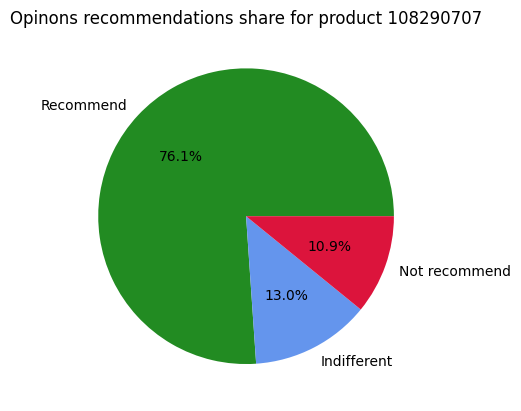

In [102]:
recommendation_distribution = opinions.authors_recommendation.value_counts(dropna=False).reindex([1,np.nan,0])
recommendation_distribution.plot.pie(
    autopct = '%1.1f%%',
    labels = ["Recommend", "Indifferent","Not recommend"],
    colors = ['forestgreen', 'cornflowerblue', 'crimson'],
    label = ''
)
plt.title(f"Opinons recommendations share for product {product_id}")


In [ ]:
opinions